In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


In [97]:
import warnings
warnings.filterwarnings('ignore')

In [98]:
df = pd.read_csv("insurance.csv")
print("There are {} rows for {} columns.".format(df.shape[0],df.shape[1]))
df.head()

There are 1338 rows for 7 columns.


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Data Inspection

In [99]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [100]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [102]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [103]:
df['charges'].median()

9382.033

In [104]:
# Check for duplicate rows
duplicates = df.duplicated()
num_duplicates = duplicates.sum()

if num_duplicates > 0:
    print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 1


In [105]:
# Get unique values in a categorical column
unique_values = df['sex'].unique()

print("Unique values in column 'column_name':", unique_values)

Unique values in column 'column_name': ['female' 'male']


In [106]:
# Get unique values in a categorical column
unique_values = df['smoker'].unique()

print("Unique values in column 'column_name':", unique_values)

Unique values in column 'column_name': ['yes' 'no']


#### Till Now i have Gained the insights that the data is all cleaned no missing values present and Each field has its own unique values with 6 columns (3 object types and 3 int and flot types)

# Outlier Check 

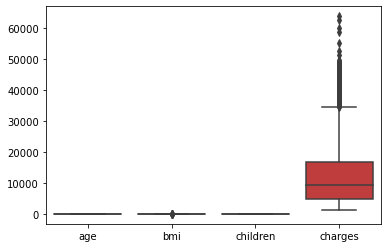

In [107]:
sns.boxplot(data=df)
plt.show()

In [108]:
float_columns = df.select_dtypes(include='float').columns
integer_columns = df.select_dtypes(include='integer').columns


for column in float_columns:
  
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]

    
    print(f"Outliers in float column {column}:")
    print(outliers)
    print("\n")


for column in integer_columns:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    
    outliers = df[(df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR))]


    print(f"Outliers in integer column {column}:")
    print(outliers)
    print("\n")

Outliers in float column bmi:
      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270


Outliers in float column charges:
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29    

#### There are so many outliers in the Charges column thus making it a bit suspecious about the results and the EDA which we are doing further so keep that in mind 

# Exploratory Data Analysis (Descriptive Statistics & Data Visualization)

## 1. Charges Analysis 

<AxesSubplot:xlabel='charges'>

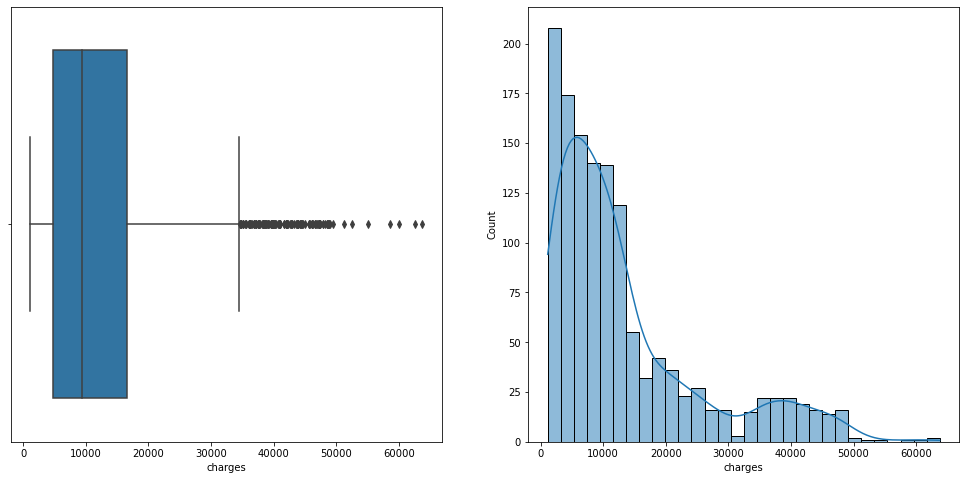

In [109]:
plt.figure(figsize = (17,8))
plt.subplot(1,2,2)
sns.histplot(x = 'charges', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'charges', data = df)

##### Even though the mean is - 13k the median is 9.3k this shows thats Charges Vary rapidly and it goes till 60k i.e. Charges depends on diffrent factors and is varying due to the outliers too

## 2. Age Analysis w.r.t to sex

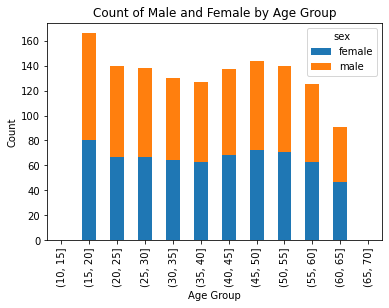

In [110]:
# As Age has no outliers - 
age_intervals = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]

# Create a new column for age groups
df['AgeGroup'] = pd.cut(df['age'], age_intervals)

# Group by age group and gender, and count the occurrences
grouped = df.groupby(['AgeGroup', 'sex']).size().unstack()

# Plot the bar graph
grouped.plot(kind='bar', stacked=True)

# Set the labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Male and Female by Age Group')

# Show the plot
plt.show()

#### There are more number of MALES who take the insurance in Comparison to he FEMALES and the rate is highest Among Age Group of [15-20]

## 3. Avg Charge Analysis w.r.t to Children 

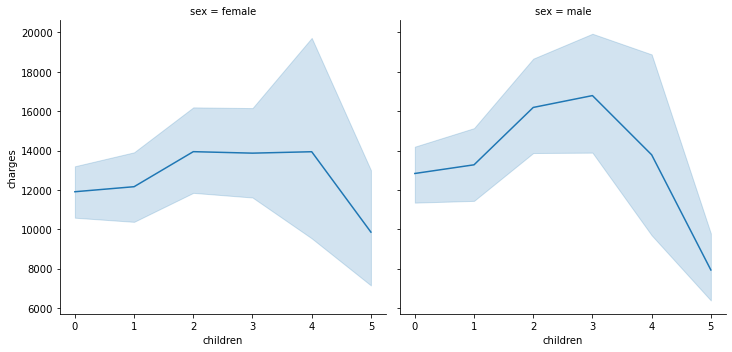

In [111]:
df['charges'] = pd.to_numeric(df['charges'], errors='coerce')
ax = sns.relplot(col="sex", y="charges", kind="line",x='children', data=df, col_wrap=3)

#### This relPlot shows that MALE with 3 children have more Charges in all the cases And similarly male with 5 children have the least charges as well in comparison to female. Females with 0 children have less insurance than Male.

## 4. Charges wrt to Region

In [113]:
# Calculate the count of each LandUse category
landuse_counts = df['region'].value_counts()

# Create a pie chart for LandUse using Plotly
fig = px.pie(df, names=landuse_counts.index, values=landuse_counts.values, title='LandUse Distribution')

# Increase the figure size
fig.update_layout(width=500, height=500)

# Show the pie chart
fig.show()

#### The land distribution is almost same in the South, east, South west and north west and north east region. The south-east region has the most number of lands. That’s why it has more number of charges at it as shown in the Below graph.

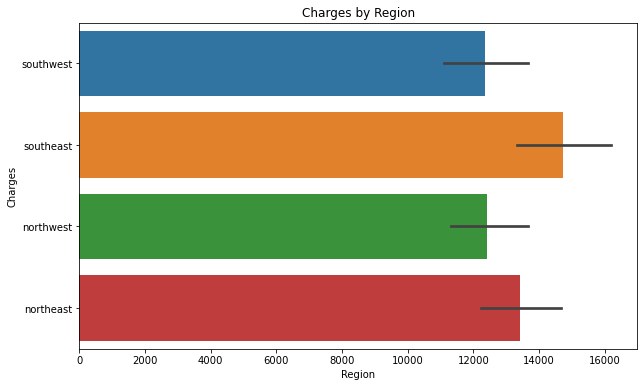

In [37]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='charges', y='region', data=df)

# Set the chart title and axis labels
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')

# Show the plot
plt.show()

#### Overall, the Southeast has the greatest medical costs, while the Southwest has the lowest. As the south-east region has most number of lands, so the charges in the south-east region or mode in comparison to the other regions

## 5. Charges wrt to BMI Category

In [38]:
bmi_ranges = [
     (float('-inf'), 16.0, 'Underweight III'),
    (16.0, 16.9, 'Underweight II'),
    (17.0, 18.4, 'Underweight I'),
    (18.5, 24.9, 'Normal range'),
    (25.0, 29.9, 'Overweight'),
    (30.0, 34.9, 'Obese I'),
    (35.0, 39.9, 'Obese II'),
    (40.0, float('inf'), 'Obese III')
]

# Create a new column 'BMI Category' and assign the corresponding category for each BMI value
df['bmi_classes'] = pd.cut(df['bmi'], bins=[start for start, _, _ in bmi_ranges] + [float('inf')], 
                            labels=[category for _, _, category in bmi_ranges], right=False)

In [39]:
# Calculate the average charges for each BMI category
avg_charges = df.groupby('bmi_classes')['charges'].mean().reset_index()

# Create a bar plot using Plotly
fig = px.bar(avg_charges, x='bmi_classes', y='charges', title='Average Charges by BMI Category')

# Show the plot
fig.show()

#### Body mass index (BMI) and costs are strongly correlated, and those with higher BMIs often also likely to pay more for insurance. This trend makes sense because high BMI is typically linked to a higher risk of chronic disease.

## 6. Smokers wrt to Charges 

<AxesSubplot:xlabel='smoker', ylabel='charges'>

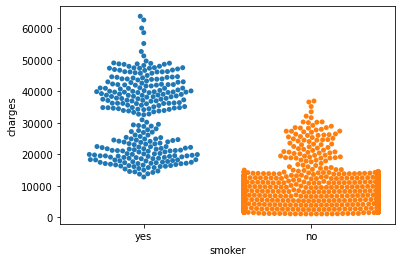

In [40]:
sns.swarmplot(x=df['smoker'],
              y=df['charges'])

#### This graph is a clear indication that people who are smokers have high charges in comparison to the people who are not basically we can see that most of the people who are non-smokers have a date charge between 0 to 10,000 whereas for smokers, it goes up to 60,000

## 7. Analysing All the aspect wrt to Smoking 

In [41]:
# Create a scatter plot using Plotly with 'strip' mode
fig = px.scatter(df, x='smoker', y='charges', title='Charges by Smokers',
                 hover_data=['bmi_classes','age','children'], color='smoker',
                 width=800, height=500)

# Set the chart title and axis labels
fig.update_layout(title='Swarm Plot: Charges by Smokers',
                  xaxis_title='Smokers',
                  yaxis_title='Charges')

# Show the plot
fig.show()

#### Here we can conclude that The people who are nonSmokers and who pay more Charge are Above normal BMI Range,Thus making it valid to charge them more. In this graph, we are analysing all the aspects that is BMI, Classes age number of children with respect to smokers yes or not, which clearly shows that the people who have higher charges in the non-smoker range for most of the cases obese or above over weight category

## 8. Charges wrt Smokers and for different BMI 

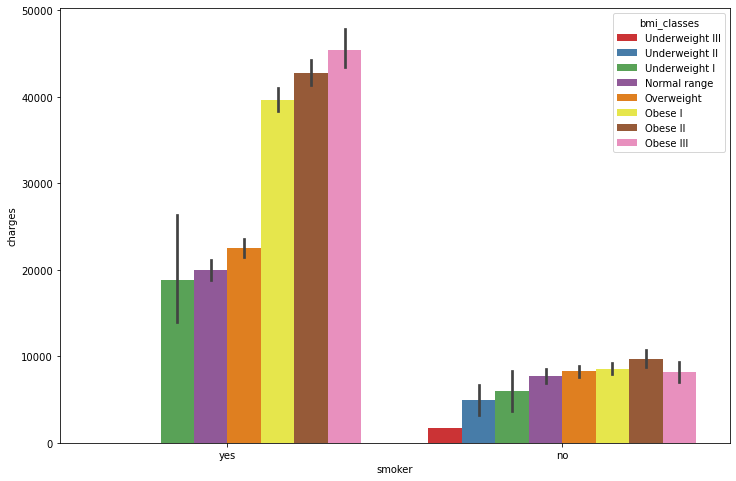

In [42]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='smoker', y='charges', hue='bmi_classes', data=df, palette='Set1')

#### This graph shows the charges with respect to the BMI classes for smokers, yes or no, and clearly shows that for people who don’t smoke have less charges but in the less charges with higher obesity, the charges increases

In [43]:
import plotly.graph_objects as go

# Define custom color scale for 'bmi_classes'
color_scale = {
    'Underweight III': 'rgb(31, 119, 180)',  # Blue
    'Underweight II': 'rgb(65, 171, 93)',    # Green
    'Underweight I': 'rgb(128, 205, 193)',   # Light Green
    'Normal range': 'rgb(255, 127, 14)',     # Orange
    'Overweight': 'rgb(252, 186, 3)',        # Yellow
    'Obese I': 'rgb(244, 109, 67)',          # Light Red
    'Obese II': 'rgb(228, 26, 28)',          # Red
    'Obese III': 'rgb(176, 28, 58)'          # Dark Red
}
# Create the bar plot using Plotly
fig = go.Figure()

# Add the bar trace for each 'bmi_classes' category
for bmi_class in df['bmi_classes'].unique():
    data_filtered = df[df['bmi_classes'] == bmi_class]
    fig.add_trace(go.Bar(
        x=data_filtered['smoker'],
        y=data_filtered['charges'],
        name=bmi_class,
        marker_color=color_scale[bmi_class]
    ))

# Set the chart title and axis labels
fig.update_layout(
    title='Bar Plot: Charges by Smokers and BMI Classes',
    xaxis_title='Smoker',
    yaxis_title='Charges'
)

# Show the plot
fig.show()

#### This graph shows the charges with respect to the BMI classes for smokers, yes or no, and clearly shows that for people who don’t smoke have less charges but in the less charges with higher obesity, the charges increases

## 9. Analysis of Smoker wrt to Children

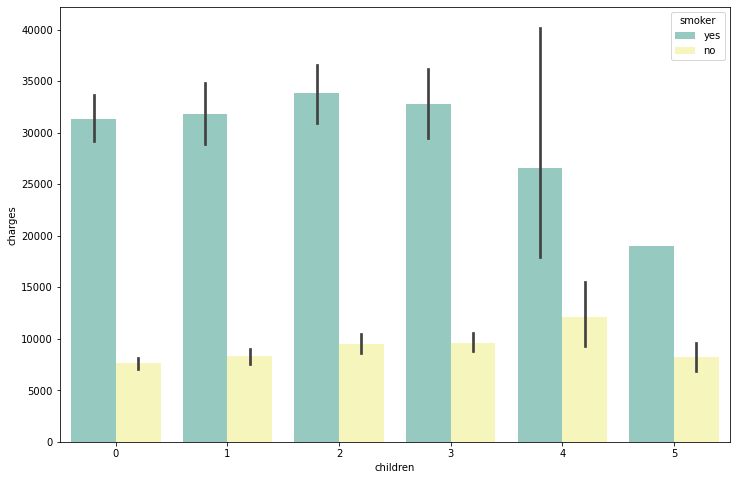

In [44]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='children', y='charges', hue='smoker', data=df, palette='Set3')

#### Smokers analysis with respect to children. Clearly the people who smoke have high number of charges whereas people who don in this situation the person who has four children has hired charges and he is a non-smoker.

## 10. Smoker wrt to regions 

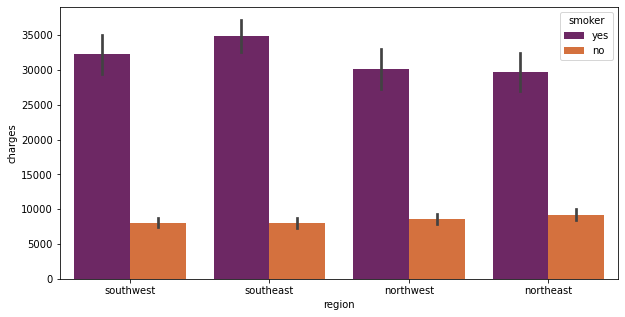

In [45]:
f, ax = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.barplot(x = 'region', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

### This shows a Analysis that The SOUTHEAST reagion has the most Charges and its High for Smokers 

## 11. HeatMap Analysis 

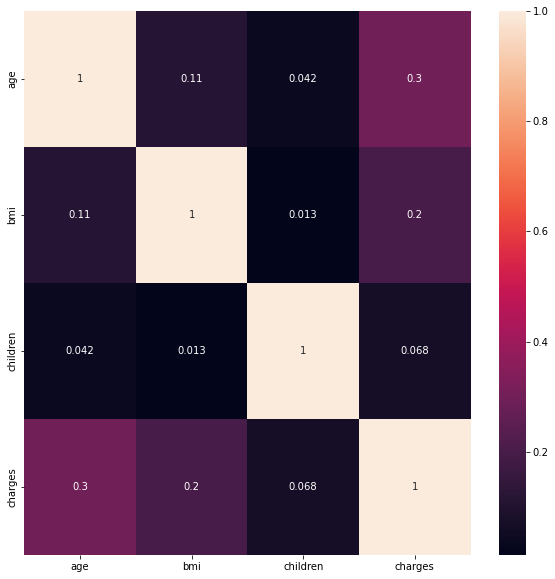

In [46]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True)


### HeatMap showing that there is very less corelation bw the variales most of them are no correlated to each other 

# Encoding 

In [47]:
# label Encoding 
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["sex"] = label.fit_transform(df["sex"]) 
df["smoker"] = label.fit_transform(df["smoker"]) 
df["region"] = label.fit_transform(df["region"]) 

In [48]:
df.head()

,age,sex,bmi,children,smoker,region,charges,AgeGroup,bmi_classes
0,19,0,27.900,0,1,3,16884.92400,"(15, 20]",Overweight
1,18,1,33.770,1,0,2,1725.55230,"(15, 20]",Obese I
2,28,1,33.000,3,0,2,4449.46200,"(25, 30]",Obese I
3,33,1,22.705,0,0,1,21984.47061,"(30, 35]",Normal range
4,32,1,28.880,0,0,1,3866.85520,"(30, 35]",Overweight


In [49]:
df.dtypes

age               int64
sex               int32
bmi             float64
children          int64
smoker            int32
region            int32
charges         float64
AgeGroup       category
bmi_classes    category
dtype: object

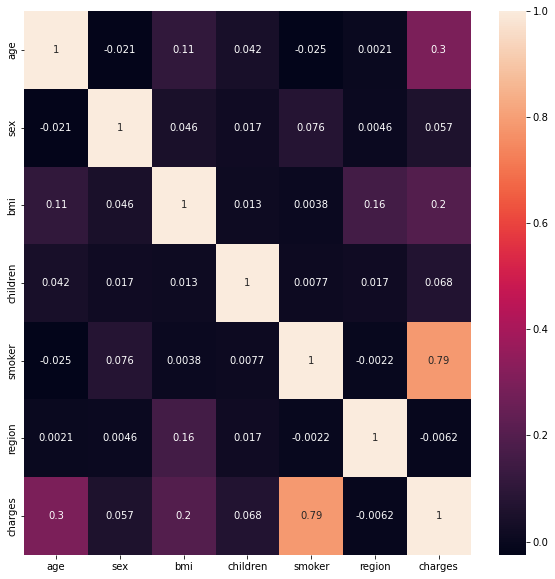

In [50]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True)

#### Here we can see that smoker after Encoding shows that it is corelated to charges. Hence Smoker is very much related to the Insurabce charges !

# Feature Selection 

In [51]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Extract the feature matrix and target variable
X = df[numeric_columns]
y = df['charges']  

# Perform feature selection using mutual information regression
selector = SelectKBest(score_func=mutual_info_regression, k='all')
selector.fit(X, y)

scores = selector.scores_
feature_names = X.columns


feature_scores = dict(zip(feature_names, scores))


sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

# Print the feature names and their scores
for feature, score in sorted_features:
    print(f"Feature: {feature}, Score: {score}")

Feature: charges, Score: 5.942439833630057
Feature: age, Score: 1.4978459002794176
Feature: children, Score: 0.16128113527674026
Feature: bmi, Score: 0.072898296491406


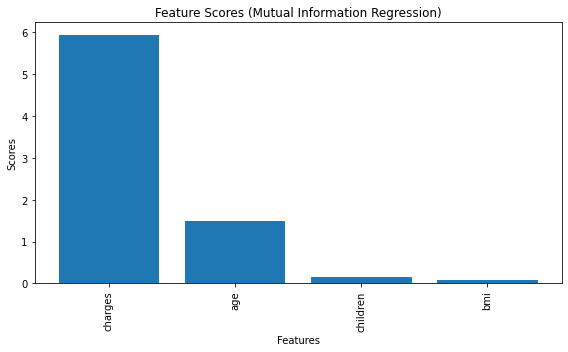

In [52]:
# Extract feature names and scores for plotting
features, scores = zip(*sorted_features)

# Create a bar graph of feature scores
plt.figure(figsize=(8, 5))
plt.bar(features, scores)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Scores')
plt.title('Feature Scores (Mutual Information Regression)')
plt.tight_layout()
plt.show()

# Model Building 

 ## 1. Linear Regression

In [53]:
from sklearn.model_selection import train_test_split as tt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

x = df.drop(['charges','AgeGroup','bmi_classes'], axis = 1)
y = df['charges']

x_train, x_test, y_train, y_test = tt(x, y, test_size=0.2, random_state=0)
eval_metrics=[["model","MAE","MSE","RMSE","R2"],0,0,0,0,0]

In [54]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    0  27.900         0       1       3
1      18    1  33.770         1       0       2
2      28    1  33.000         3       0       2
3      33    1  22.705         0       0       1
4      32    1  28.880         0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970         3       0       1
1334   18    0  31.920         0       0       0
1335   18    0  36.850         0       0       2
1336   21    0  25.800         0       0       3
1337   61    0  29.070         0       1       1

[1338 rows x 6 columns]


In [55]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [56]:
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [57]:
# loading the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

### Model Evaluation (Test Data)

In [58]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_pred = regressor.predict(x_test)
print("MAE ->",mean_absolute_error(y_test,y_pred))
print("MSE ->",mean_squared_error(y_test,y_pred))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_pred)))
print("R2_Score ->",r2_score(y_test,y_pred))

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

err=["Linear Regression",mae,mse,rmse,r2]
eval_metrics[1]=err


MAE -> 3930.333273901141
MSE -> 31845929.13415944
RMSE -> 62.69237014103982
R2_Score -> 0.7998747145449959


### Model Evaluation (Train Data)

In [59]:
# prediction on training data
y_pred_train =regressor.predict(x_train)
print("MAE ->",mean_absolute_error(y_train,y_pred_train))
print("MSE ->",mean_squared_error(y_train,y_pred_train))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,y_pred_train)))
print("R2_Score ->",r2_score(y_train,y_pred_train))

MAE -> 4235.383876032093
MSE -> 37729580.5098492
RMSE -> 65.07982695146087
R2_Score -> 0.7368306228430944


## 2. Ridge Regression

In [60]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

# Define a range of alpha values to test
alphas = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# Perform cross-validation for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    mse_scores = -cross_val_score(ridge, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
    avg_mse = np.mean(mse_scores)
    print(f"Alpha={alpha}, Average MSE: {avg_mse}")

Alpha=0.1, Average MSE: 38204905.58233534
Alpha=0.2, Average MSE: 38205036.716369435
Alpha=0.3, Average MSE: 38205262.39272244
Alpha=0.4, Average MSE: 38205582.19904311
Alpha=0.5, Average MSE: 38205995.72477923
Alpha=0.6, Average MSE: 38206502.561168775
Alpha=0.7, Average MSE: 38207102.30123131
Alpha=0.8, Average MSE: 38207794.539759316
Alpha=0.9, Average MSE: 38208578.873309664
Alpha=1.0, Average MSE: 38209454.900195025


In [61]:
## alpha value that yields the best performance (e.g., lowest MSE) on the validation data.

In [62]:
Ridge = Ridge(alpha=1.0)
Ridge.fit(x_train, y_train)

Ridge()

In [63]:
from sklearn.metrics import mean_squared_error
y_pred_r = Ridge.predict(x_test)

### Model Evaluation (Test Data)

In [64]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,y_pred_r))
print("MSE ->",mean_squared_error(y_test,y_pred_r))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_pred_r)))
print("R2_Score ->",r2_score(y_test,y_pred_r))

mae = mean_absolute_error(y_test,y_pred_r)
mse = mean_squared_error(y_test,y_pred_r)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred_r)
err=["Ridge Regression Model",mae,mse,rmse,r2]
eval_metrics[2]=err

MAE -> 3942.9518574700683
MSE -> 31903202.87512911
RMSE -> 62.79292840336456
R2_Score -> 0.7995147965249455


In [65]:
# prediction on training data
y_pred_train_r =Ridge.predict(x_train)
print("MAE ->",mean_absolute_error(y_train,y_pred_train_r))
print("MSE ->",mean_squared_error(y_train,y_pred_train_r))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,y_pred_train_r)))
print("R2_Score ->",r2_score(y_train,y_pred_train_r))

MAE -> 4244.302952871445
MSE -> 37732546.03188905
RMSE -> 65.14831504245866
R2_Score -> 0.7368099378903961


## 3. Lasso Regression

In [66]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(x_train, y_train)


Lasso(alpha=0.2)

In [67]:
y_pred_l = Lasso.predict(x_test)

In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,y_pred_l))
print("MSE ->",mean_squared_error(y_test,y_pred_l))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_pred_l)))
print("R2_Score ->",r2_score(y_test,y_pred_l))

MAE -> 3930.478756589607
MSE -> 31846834.730446473
RMSE -> 62.6935304205275
R2_Score -> 0.7998690236224706


In [69]:
y_pred_train_l = Lasso.predict(x_train)
print("MAE ->",mean_absolute_error(y_train,y_pred_train_l))
print("MSE ->",mean_squared_error(y_train,y_pred_train_l))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,y_pred_train_l)))
print("R2_Score ->",r2_score(y_train,y_pred_train_l))

MAE -> 4235.453069411862
MSE -> 37729581.00157293
RMSE -> 65.0803585531907
R2_Score -> 0.736830619413249


## 4. rf Regression

In [70]:
from sklearn.ensemble import RandomForestRegressor as rfr
x = df.drop(['charges'], axis=1)
y = df.charges
Rfr = rfr(n_estimators = 100, criterion = 'friedman_mse',
                              random_state = 1,
                              n_jobs = -1)
Rfr.fit(x_train,y_train)
x_train_pred = Rfr.predict(x_train)
x_test_pred = Rfr.predict(x_test)

### Model Evaluation (Test Data)

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,x_test_pred))
print("MSE ->",mean_squared_error(y_test,x_test_pred))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,x_test_pred)))
print("R2_Score ->",r2_score(y_test,x_test_pred))

mae = mean_absolute_error(y_test,x_test_pred)
mse = mean_squared_error(y_test,x_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,x_test_pred)
err=["Random Forest Regression",mae,mse,rmse,r2]
eval_metrics[3]=err

MAE -> 2629.991602102189
MSE -> 19580381.390329055
RMSE -> 51.28344374261726
R2_Score -> 0.8769535221111118


### MOdel Evaluation (Train Data)

In [72]:
print("MAE ->",mean_absolute_error(y_train,x_train_pred))
print("MSE ->",mean_squared_error(y_train,x_train_pred))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,x_train_pred)))
print("R2_Score ->",r2_score(y_train,x_train_pred))

MAE -> 1047.6187716706281
MSE -> 3627543.3133752937
RMSE -> 32.366939485694786
R2_Score -> 0.9746973514815129


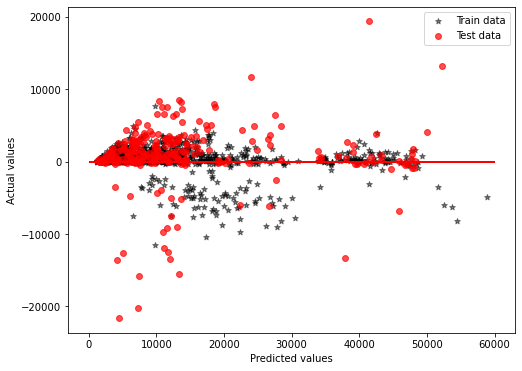

In [73]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train,
          c = 'black', marker = '*', s = 35, alpha = 0.5,
          label = 'Train data')

plt.scatter(x_test_pred, x_test_pred - y_test,
          c = 'red', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

## Feature Selection Rate

Feature importance ranking


1. smoker (0.601678)
2. bmi (0.218492)
3. age (0.136950)
4. children (0.021107)
5. region (0.015409)
6. sex (0.006364)


<BarContainer object of 6 artists>

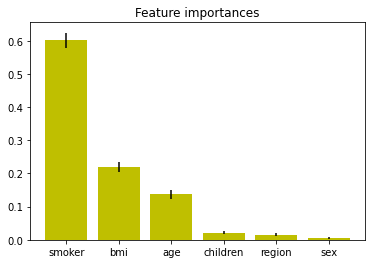

In [74]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

variables = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

importance_list = []
for f in range(min(x.shape[1], len(variables))):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d. %s (%f)" % (f + 1, variable, importances[indices[f]]))
    
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [75]:
df.head()

,age,sex,bmi,children,smoker,region,charges,AgeGroup,bmi_classes
0,19,0,27.900,0,1,3,16884.92400,"(15, 20]",Overweight
1,18,1,33.770,1,0,2,1725.55230,"(15, 20]",Obese I
2,28,1,33.000,3,0,2,4449.46200,"(25, 30]",Obese I
3,33,1,22.705,0,0,1,21984.47061,"(30, 35]",Normal range
4,32,1,28.880,0,0,1,3866.85520,"(30, 35]",Overweight


## 4. Polynomial Regression 

In [76]:
from sklearn.preprocessing import PolynomialFeatures

x = df.drop(['charges','AgeGroup','bmi_classes','sex'], axis = 1)
y = df.charges

pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(x)

x_train, x_test, y_train, y_test = tt(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(x_train, y_train)

y_train_pred = Pol_reg.predict(x_train)
y_test_pred = Pol_reg.predict(x_test)

### Model Evaluation (Test Data)

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,y_test_pred))
print("MSE ->",mean_squared_error(y_test,y_test_pred))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_test_pred)))
print("R2_Score ->",r2_score(y_test,y_test_pred))

mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)
err=["Polynomial Regression",mae,mse,rmse,r2]
eval_metrics[4]=err

MAE -> 2899.4450237900974
MSE -> 18729358.035948996
RMSE -> 53.8464950000471
R2_Score -> 0.8823014989594776


### Model Evaluation (Train Data)

In [78]:
print("MAE ->",mean_absolute_error(y_train,y_train_pred))
print("MSE ->",mean_squared_error(y_train,y_train_pred))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,y_train_pred)))
print("R2_Score ->",r2_score(y_train,y_train_pred))

MAE -> 2932.934647202127
MSE -> 23621801.409892865
RMSE -> 54.156575290560305
R2_Score -> 0.8352344584710447


In [79]:
##Predicting the charges
y_test_pred = Pol_reg.predict(x_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

,Actual,Predicted
578,9724.53000,11851.170052
610,8547.69130,10162.090622
569,45702.02235,48995.768687
1034,12950.07120,14201.008650
198,9644.25250,8389.389960
...,...,...
1084,15019.76005,16700.567688
726,6664.68595,8686.775634
1132,20709.02034,13213.136268
725,40932.42950,41300.963900


## 5. SVR Model

In [80]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train,y_train)

SVR()

In [81]:
y_pred1 = svm.predict(x_test)

In [82]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,y_pred1))
print("MSE ->",mean_squared_error(y_test,y_pred1))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_pred1)))
print("R2_Score ->",r2_score(y_test,y_pred1))

MAE -> 8537.14343366542
MSE -> 175432069.10567868
RMSE -> 92.39666354184777
R2_Score -> -0.10244523750060863


## 6. Gradient Boosting

In [83]:
from sklearn.ensemble import GradientBoostingRegressor
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)

GradientBoostingRegressor()

In [84]:
y_pred2 = gr.predict(x_test)
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,y_pred2))
print("MSE ->",mean_squared_error(y_test,y_pred2))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_pred2)))
print("R2_Score ->",r2_score(y_test,y_pred2))


mae = mean_absolute_error(y_test,y_pred2)
mse = mean_squared_error(y_test,y_pred2)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred2)
err=["Gradient Boosting Regression",mae,mse,rmse,r2]
eval_metrics[5]=err

MAE -> 2528.047659313625
MSE -> 17951810.224168975
RMSE -> 50.2796943040988
R2_Score -> 0.8871877428850937


In [85]:
y_train_pred_g = gr.predict(x_train)
print("MAE ->",mean_absolute_error(y_train,y_train_pred_g))
print("MSE ->",mean_squared_error(y_train,y_train_pred_g))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,y_train_pred_g)))
print("R2_Score ->",r2_score(y_train,y_train_pred_g))

MAE -> 1946.1362829549485
MSE -> 12597649.197682105
RMSE -> 44.11503465888867
R2_Score -> 0.9121295427037749


In [86]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


# Initialize the decision tree regression model
dt_regressor = DecisionTreeRegressor()

# Fit the model to the training data
dt_regressor.fit(x_train, y_train)

# Make predictions on the testing data
y_pred_dt = dt_regressor.predict(x_test)


In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MAE ->",mean_absolute_error(y_test,y_pred_dt))
print("MSE ->",mean_squared_error(y_test,y_pred_dt))
print("RMSE ->",np.sqrt(mean_absolute_error(y_test,y_pred_dt)))
print("R2_Score ->",r2_score(y_test,y_pred_dt))


MAE -> 3715.084941544776
MSE -> 55449831.70582473
RMSE -> 60.951496630884925
R2_Score -> 0.6515437388618365


In [88]:
y_train_pred_dt = dt_regressor.predict(x_train)
print("MAE ->",mean_absolute_error(y_train,y_train_pred_dt))
print("MSE ->",mean_squared_error(y_train,y_train_pred_dt))
print("RMSE ->",np.sqrt(mean_absolute_error(y_train,y_train_pred_dt)))
print("R2_Score ->",r2_score(y_train,y_train_pred_dt))

MAE -> 30.486534018691586
MSE -> 244463.03195243288
RMSE -> 5.521461221333677
R2_Score -> 0.9982948343716672


In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid
param_grid = {
    "max_depth": [3, 5, 7],
    "min_samples_split": [2, 4, 8],
    "min_samples_leaf": [1, 2, 4],
}

# Create the DecisionTreeRegressor model
tree = DecisionTreeRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=tree, param_grid=param_grid, cv=5)

# Perform grid search on the dataset
grid_search.fit(x_train, y_train)  

# Print the best parameter combination
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best score:  0.8307925080204523


In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    "n_estimators": [100, 200, 300, 400],
    "max_features": ["auto", "sqrt","log2"],
    "min_samples_split": [2, 4, 8],
    "bootstrap": [True, False]
}

# Create the RandomForestRegressor model
rf = RandomForestRegressor()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Perform grid search on the dataset
grid_search.fit(x_train, y_train) 

# Print the best parameter combination
print("Best parameters: ", grid_search.best_params_)

# Print the best score
print("Best score: ", grid_search.best_score_)


Best parameters:  {'bootstrap': True, 'max_features': 'sqrt', 'min_samples_split': 8, 'n_estimators': 400}
Best score:  0.8386628164826124


## Score Analysis of the Major Algorithms -

In [91]:
from tabulate import tabulate
print(tabulate(eval_metrics,headers="firstrow"))

model                             MAE          MSE     RMSE        R2
----------------------------  -------  -----------  -------  --------
Linear Regression             3930.33  3.18459e+07  5643.22  0.799875
Ridge Regression Model        3942.95  3.19032e+07  5648.29  0.799515
Random Forest Regression      2629.99  1.95804e+07  4424.97  0.876954
Polynomial Regression         2899.45  1.87294e+07  4327.74  0.882301
Gradient Boosting Regression  2528.05  1.79518e+07  4236.96  0.887188


In [92]:
df1 = pd.DataFrame({'Actual':y_test,'gr':y_pred2,'PloyR':y_test_pred,
                  'Rf':x_test_pred})

In [93]:
df1

,Actual,gr,PloyR,Rf
578,9724.53000,10903.234075,11851.170052,12184.615023
610,8547.69130,9798.363714,10162.090622,10132.515056
569,45702.02235,46026.049943,48995.768687,44695.034190
1034,12950.07120,13751.737851,14201.008650,13245.465793
198,9644.25250,9378.565973,8389.389960,10410.237184
...,...,...,...,...
1084,15019.76005,16311.568785,16700.567688,16384.764993
726,6664.68595,7278.063702,8686.775634,6577.481215
1132,20709.02034,11344.905953,13213.136268,11571.218319
725,40932.42950,42979.884784,41300.963900,40932.246912
